In [641]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [642]:
def create_state(N):
    state = np.random.choice([1,-1],(N,N)) 
    return state


In [643]:
create_state(5)

array([[-1,  1, -1,  1,  1],
       [-1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1],
       [-1, -1, -1,  1,  1]])

In [644]:
def Magnetisation(state,N):
    M = np.sum(state)
    return(M)

In [645]:
def neighbour_interaction_energy(state,i,j,N):
    interaction_energy= state[i][j]*(state[(i-1)%N][j]+state[i][(j-1)%N]+state[(i+1)%N][j]+state[i][(j+1)%N])
    return interaction_energy

In [646]:
def mcstep(state,N,kb,T):
    for i in range(N):
        for j in range(N):
            x = rand.randint(0,N-1)
            y = rand.randint(0,N-1)
            chance = rand.random()
            if(neighbour_interaction_energy(state,x,y,N)<0):
                state[x][y]*=-1
            else:
                if(chance<np.exp(-1*2*neighbour_interaction_energy(state,x,y,N)/(kb*T))):
                    state[x][y]*=-1
    return state

In [647]:
def Hamiltonian(state,J,B,N):
    sum=0
    external_energy = 0
    interaction_energy = 0
    for i in range(N):
        for j in range(N):
            external_energy += (state[i][j])
            interaction_energy+= neighbour_interaction_energy(state,i,j,N)
    final_energy = (-B*external_energy+-J*interaction_energy/2)
    return final_energy

In [648]:
# it will take some steps to reach equilibrium

In [649]:
N=10
EperT=[]
MperT=[]
CperT=[]
XperT=[]
J=1
state=create_state(N)
for T in np.linspace(1.5,3.5,90):
    E=0
    M=0
    E_square=0
    M_square=0
    Tpower2=T*T
    for steps in range(2048):
        state = mcstep(state,N,1,T)
        if(steps>1048):
            e_state=Hamiltonian(state,J,0,N)
            m_state=Magnetisation(state,N)
            E+=e_state
            M+=m_state
            E_square+=e_state*e_state
            M_square+=m_state*m_state
    EperT.append(E/(1048*100))
    MperT.append(M/(1048*100))
    CperT.append(((E_square/(1048*100)-(E/(1048*100))**2))*(Tpower2))
    XperT.append((M_square/(1048*100)-(M/(1048*100))**2)*(Tpower2))


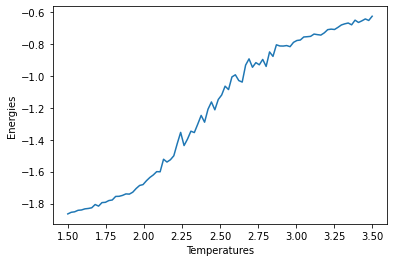

In [661]:
plt.plot(np.linspace(1.5,3.5,90),EperT)
plt.ylabel("Energies")
plt.xlabel("Temperatures")
plt.show()

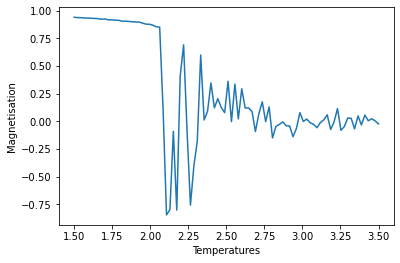

In [662]:
plt.plot(np.linspace(1.5,3.5,90),MperT)
plt.ylabel("Magnetisation")
plt.xlabel("Temperatures")
plt.show()

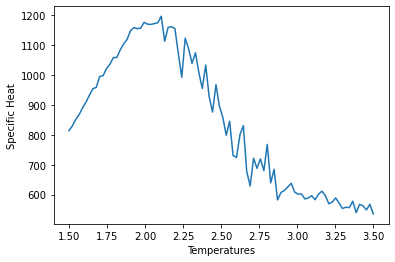

In [663]:
plt.plot(np.linspace(1.5,3.5,90),CperT)
plt.ylabel("Specific Heat")
plt.xlabel("Temperatures")
plt.show()

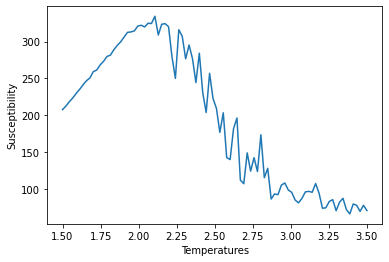

In [664]:
plt.plot(np.linspace(1.5,3.5,90),XperT)
plt.ylabel("Susceptibility")
plt.xlabel("Temperatures")
plt.show()

In [654]:
Hamiltonian(create_state(10),1,0,10)

-8.0

In [655]:
def Metropolis_Simulation(num_steps,state,J,B,N,kB,T):
    statelist=[state.copy()]
    for step in range(num_steps):
        for i in range(N):
            for j in range(N):
                x=rand.randint(0,N-1)
                y=rand.randint(0,N-1)
                copy=statelist[-1].copy()
                e_before = Hamiltonian(statelist[-1],J,B,N)
                copy[x][y]*=-1          # to flip that value
                e_after = Hamiltonian(copy,J,B,N)
                del_e =e_after-e_before
                p = min(1,np.exp(-1*(del_e)/kB*T))
                chance=rand.random()
        if(chance<p):
            statelist.append(copy)
        else:
            statelist.append(statelist[-1])
    return statelist

In [656]:
# N=10
# J=1
# B=0
# kb=1
# T=5
# num_steps=2048
# state= create_state(N)
# state_list = Metropolis_Simulation(num_steps,state,J,B,N,kb,T)
# energies= [Hamiltonian(obj,J,B,N) for obj in state_list]
# plt.plot(range(num_steps+1),energies)
# plt.ylabel("Energies")
# plt.xlabel("Steps")

In [657]:
# N=10
# J=1
# B=0
# kb=1
# num_steps=2048
# T_end=10
# state= create_state(N)
# EvsT(state,T_end,num_steps,J,B,N,kb)

In [658]:
## using the fact d(Cv)/dt = d^2(U)/dt^2 , as we know U is a moment generating function for E, so we get Var(E)/kb*T^2
# def HeatCapacity(energies,kb,T):
#     eq_energies=energies[len(energies)-100:]
#     E_power2 = np.mean([e**2 for e in eq_energies])
#     E_mean_square = (np.mean(eq_energies))**2
#     return((E_power2-E_mean_square)/(kb*T**2))
# HeatCapacity(energies,kb,T)

In [659]:
# def Susceptibility()